# ASSIGNMENT 4

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report

## 1. Data Processing:

a) Import the data: You are provided separate .csv files for train and test.

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
print("Train Data: " + str(train_data.shape) + "\nTest Data: " + str(test_data.shape))

Train Data: (507, 148)
Test Data: (168, 148)


b) Remove any rows that have missing data across both sets of data.

In [3]:
train_data = train_data.dropna()
test_data = test_data.dropna()
print("Train Data: " + str(train_data.shape) + "\nTest Data: " + str(test_data.shape))

Train Data: (507, 148)
Test Data: (168, 148)


c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [4]:
X_train = train_data.drop(['class'], axis=1)
X_test = test_data.drop(['class'], axis=1)
y_train = train_data['class']
y_test = test_data['class']

d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.<br>
a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [6]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [7]:
y_pred = clf.predict(X_test_scaled)
y_pred

array(['building ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'grass ', 'shadow ', 'building ', 'tree ',
       'soil ', 'building ', 'shadow ', 'pool ', 'shadow ', 'concrete ',
       'tree ', 'grass ', 'concrete ', 'grass ', 'building ', 'building ',
       'building ', 'asphalt ', 'shadow ', 'concrete ', 'tree ', 'tree ',
       'concrete ', 'asphalt ', 'concrete ', 'tree ', 'concrete ',
       'concrete ', 'tree ', 'building ', 'building ', 'building ',
       'grass ', 'grass ', 'shadow ', 'concrete ', 'soil ', 'shadow ',
       'tree ', 'car ', 'car ', 'asphalt ', 'pool ', 'building ', 'tree ',
       'grass ', 'grass ', 'car ', 'car ', 'pool ', 'building ', 'soil ',
       'grass ', 'building ', 'building ', 'building ', 'soil ',
       'concrete ', 'building ', 'asphalt ', 'pool ', 'pool ', 'shadow ',
       'building ', 'grass ', 'asphalt ', 'asphalt ', 'pool ', 'pool 

c) Calculate the confusion matrix and classification report for the test data. 

In [8]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 19,  0,  4,  1,  0,  0,  0,  0],
       [ 1,  2, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  5],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  1,  0,  5,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]], dtype=int64)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    asphalt        0.74      1.00      0.85        14
   building        0.76      0.76      0.76        25
        car        0.92      0.80      0.86        15
   concrete        0.66      0.83      0.73        23
      grass        0.83      0.83      0.83        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.88      0.93        16
       soil        0.83      0.36      0.50        14
       tree        0.75      0.88      0.81        17

    accuracy                           0.80       168
   macro avg       0.83      0.80      0.80       168
weighted avg       0.82      0.80      0.80       168



d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [10]:
y_pred_train = clf.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 83,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]], dtype=int64)

In [11]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



There are signs of overfitting as it can be seen that the precision, recall and f1-scores are 1 for all labels on the train dataset and not on the test data. The model is performing very well on trained data but not on unseen/test data for most of the labels.

e) Identify the top 5 features. Feel free to print a list OR to make a plot. 

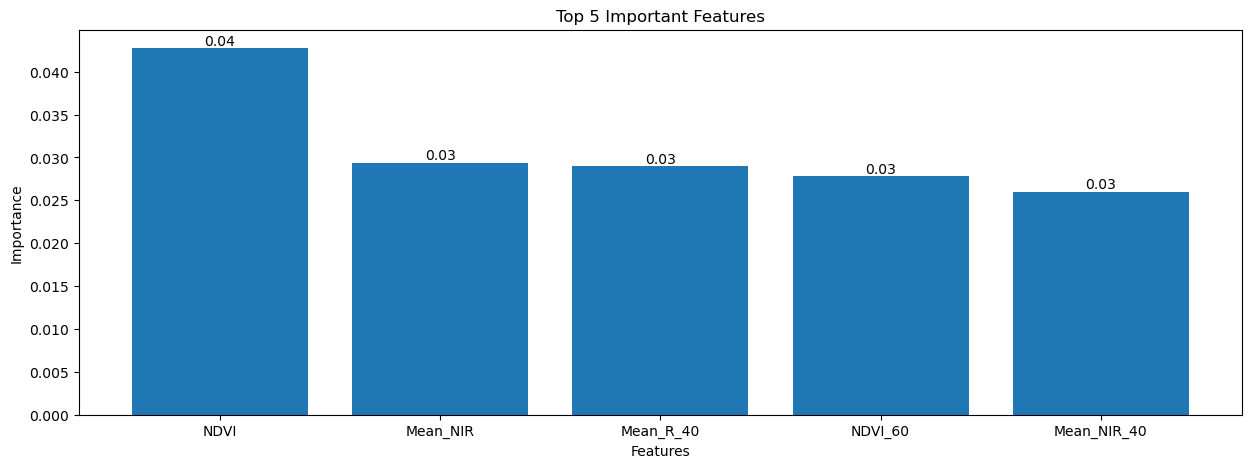

In [12]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_train.columns[indices][:5]

plt.figure(figsize=(15,5))
plt.title("Top 5 Important Features")
bar_plot = plt.bar(range(len(top_features)), importances[indices][:5], align='center')
plt.xticks(range(len(top_features)), top_features)
plt.xlabel("Features")
plt.ylabel("Importance")
for i, v in enumerate(importances[indices][:5]):
    plt.text(i, v, str(round(v,2)), ha='center', va='bottom')
plt.show()

## 3. LinearSVM Classifier - Base Model:

Create a simple LinearSVC Classifier only using default parameters.<br>
a) Use the LinearSVC in sklearn. Fit your model on the training data.

In [13]:
l_svc = LinearSVC(max_iter=10000, random_state=42)
l_svc.fit(X_train_scaled, y_train)

LinearSVC(max_iter=10000, random_state=42)

b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [14]:
y_pred_lsvc = l_svc.predict(X_test_scaled)
y_pred_lsvc

array(['car ', 'concrete ', 'building ', 'concrete ', 'asphalt ', 'tree ',
       'car ', 'car ', 'building ', 'tree ', 'building ', 'asphalt ',
       'building ', 'grass ', 'shadow ', 'building ', 'grass ',
       'building ', 'building ', 'shadow ', 'pool ', 'shadow ',
       'concrete ', 'tree ', 'grass ', 'concrete ', 'grass ', 'building ',
       'building ', 'building ', 'asphalt ', 'shadow ', 'building ',
       'grass ', 'tree ', 'building ', 'asphalt ', 'concrete ', 'tree ',
       'concrete ', 'concrete ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'asphalt ', 'shadow ', 'building ', 'soil ',
       'tree ', 'tree ', 'car ', 'car ', 'shadow ', 'pool ', 'building ',
       'grass ', 'tree ', 'grass ', 'car ', 'car ', 'pool ', 'concrete ',
       'concrete ', 'grass ', 'building ', 'building ', 'building ',
       'soil ', 'concrete ', 'building ', 'car ', 'pool ', 'pool ',
       'shadow ', 'building ', 'grass ', 'shadow ', 'grass ', 'pool ',
       'poo

c) Calculate the confusion matrix and classification report for test data.

In [15]:
confusion_matrix(y_test, y_pred_lsvc)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 21,  0,  2,  2,  0,  0,  0,  0],
       [ 0,  1, 12,  1,  0,  0,  0,  0,  1],
       [ 1,  5,  0, 16,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  1, 21,  0,  0,  0,  6],
       [ 1,  0,  1,  0,  0, 12,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 13,  0,  1],
       [ 0,  4,  0,  3,  3,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0, 14]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

    asphalt        0.72      0.93      0.81        14
   building        0.68      0.84      0.75        25
        car        0.92      0.80      0.86        15
   concrete        0.67      0.70      0.68        23
      grass        0.75      0.72      0.74        29
       pool        1.00      0.80      0.89        15
     shadow        0.87      0.81      0.84        16
       soil        1.00      0.29      0.44        14
       tree        0.61      0.82      0.70        17

    accuracy                           0.75       168
   macro avg       0.80      0.75      0.75       168
weighted avg       0.78      0.75      0.74       168



d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [17]:
y_pred_train_lsvc = l_svc.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train_lsvc)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 80,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]], dtype=int64)

In [18]:
print(classification_report(y_train, y_pred_train_lsvc))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507



There are signs of overfitting as it can be seen that the precision, recall and f1-scores are 1 for majority of the labels on the train dataset and not on the test data. The model is performing very well on trained data but not on unseen/test data for most of the labels.

## 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.<br>
a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing

In [19]:
param_grid = {'C': np.arange(0.01, 10, 0.2)}
svc_l = SVC(kernel='linear', random_state=42)
svc_l_gs = GridSearchCV(svc_l, param_grid, cv=5, verbose=0)
svc_l_gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])})

b) Identify the best performing model:

In [20]:
print(svc_l_gs.best_estimator_, svc_l_gs.best_params_)

SVC(C=0.01, kernel='linear', random_state=42) {'C': 0.01}


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [21]:
y_pred_svc_l = svc_l_gs.best_estimator_.predict(X_test_scaled)
y_pred_svc_l

array(['car ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'tree ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'grass ', 'shadow ', 'building ', 'tree ',
       'concrete ', 'building ', 'shadow ', 'pool ', 'asphalt ',
       'concrete ', 'tree ', 'grass ', 'concrete ', 'grass ', 'building ',
       'building ', 'building ', 'asphalt ', 'shadow ', 'concrete ',
       'grass ', 'tree ', 'concrete ', 'asphalt ', 'concrete ', 'tree ',
       'concrete ', 'concrete ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'grass ', 'shadow ', 'concrete ', 'soil ',
       'shadow ', 'tree ', 'car ', 'car ', 'shadow ', 'pool ',
       'building ', 'tree ', 'grass ', 'grass ', 'car ', 'car ', 'pool ',
       'building ', 'soil ', 'grass ', 'building ', 'concrete ',
       'building ', 'soil ', 'concrete ', 'building ', 'shadow ', 'pool ',
       'pool ', 'shadow ', 'building ', 'grass ', 'shadow ', 'building ',
       'pool ', '

d) Calculate the confusion matrix and classification report for test data.

In [22]:
confusion_matrix(y_test, y_pred_svc_l)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 25,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0, 13,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  6,  3,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 16]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred_svc_l))

              precision    recall  f1-score   support

    asphalt        0.81      0.93      0.87        14
   building        0.79      0.88      0.83        25
        car        1.00      0.93      0.97        15
   concrete        0.66      0.83      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        0.87      0.81      0.84        16
       soil        0.80      0.29      0.42        14
       tree        0.84      0.94      0.89        17

    accuracy                           0.83       168
   macro avg       0.85      0.82      0.81       168
weighted avg       0.84      0.83      0.82       168



e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [24]:
y_pred_svc_l_train = svc_l_gs.best_estimator_.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_svc_l_train)

array([[40,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2, 87,  0,  7,  0,  0,  1,  0,  0],
       [ 0,  1, 19,  1,  0,  0,  0,  0,  0],
       [ 0,  9,  0, 83,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 70,  0,  0,  0, 12],
       [ 0,  1,  0,  0,  1, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  3,  0,  4,  2,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 85]], dtype=int64)

In [25]:
print(classification_report(y_train, y_pred_svc_l_train))

              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507



There isn't overfitting, while the model does perform better on the training set, it perfrms similarily on the test data

## 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.<br>

a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [26]:
param_grid = {'C': np.arange(0.01, 10, 0.2), 'degree': [2, 3, 4, 5, 6]}
svc_p = SVC(kernel='poly', random_state=42)
svc_poly = GridSearchCV(svc_p, param_grid, cv=5, verbose=0)
svc_poly.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42),
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                         'degree': [2, 3, 4, 5, 6]})

b) Identify the best performing model:

In [27]:
print(svc_poly.best_estimator_, svc_poly.best_params_)

SVC(C=3.81, kernel='poly', random_state=42) {'C': 3.81, 'degree': 3}


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [28]:
y_pred_poly = svc_poly.best_estimator_.predict(X_test_scaled)
y_pred_poly

array(['soil ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'soil ', 'shadow ', 'building ', 'tree ',
       'concrete ', 'building ', 'shadow ', 'pool ', 'asphalt ',
       'concrete ', 'grass ', 'grass ', 'concrete ', 'grass ',
       'building ', 'grass ', 'building ', 'asphalt ', 'shadow ',
       'concrete ', 'grass ', 'tree ', 'concrete ', 'asphalt ',
       'concrete ', 'grass ', 'concrete ', 'concrete ', 'tree ',
       'building ', 'building ', 'building ', 'grass ', 'grass ',
       'shadow ', 'grass ', 'grass ', 'shadow ', 'tree ', 'car ', 'car ',
       'shadow ', 'pool ', 'building ', 'tree ', 'grass ', 'grass ',
       'car ', 'car ', 'pool ', 'building ', 'grass ', 'grass ',
       'building ', 'concrete ', 'building ', 'grass ', 'concrete ',
       'building ', 'shadow ', 'pool ', 'pool ', 'shadow ', 'building ',
       'grass ', 'shadow ', 'building ', 'building 

d) Calculate the confusion matrix and classification report for test data.

In [29]:
confusion_matrix(y_test, y_pred_poly)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 18,  0,  4,  3,  0,  0,  0,  0],
       [ 0,  2, 11,  0,  0,  1,  0,  1,  0],
       [ 0,  3,  0, 19,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  2],
       [ 0,  4,  0,  0,  0, 10,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 14,  0,  1],
       [ 0,  1,  0,  5,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  0, 13]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.64      0.72      0.68        25
        car        1.00      0.73      0.85        15
   concrete        0.66      0.83      0.73        23
      grass        0.63      0.90      0.74        29
       pool        0.91      0.67      0.77        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.74       168
   macro avg       0.72      0.71      0.71       168
weighted avg       0.71      0.74      0.71       168



e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [31]:
y_pred_train_poly = svc_poly.best_estimator_.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train_poly)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 95,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0, 91,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0, 84]], dtype=int64)

In [32]:
print(classification_report(y_train, y_pred_train_poly))

              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0.95      0.95       507



There are signs of overfitting as it can be seen that the precision, recall and f1-scores are much better for the train data than the test data.

## 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.<br>

a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [33]:
param_grid = {'C': np.arange(0.01, 10, 0.2), 'gamma': [0.01, 0.1, 1, 10, 100]}
svc_r = SVC(kernel='rbf', random_state=42)
svc_rbf = GridSearchCV(svc_r, param_grid, cv=5, verbose=0)
svc_rbf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                         'gamma': [0.01, 0.1, 1, 10, 100]})

b) Identify the best performing model:

In [34]:
print(svc_rbf.best_estimator_, svc_rbf.best_params_)

SVC(C=2.81, gamma=0.01, random_state=42) {'C': 2.81, 'gamma': 0.01}


c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [35]:
y_pred_rbf = svc_rbf.best_estimator_.predict(X_test_scaled)
y_pred_rbf

array(['car ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'tree ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'building ', 'shadow ', 'building ',
       'tree ', 'concrete ', 'building ', 'shadow ', 'pool ', 'asphalt ',
       'concrete ', 'tree ', 'grass ', 'concrete ', 'grass ', 'building ',
       'building ', 'building ', 'asphalt ', 'shadow ', 'concrete ',
       'grass ', 'tree ', 'concrete ', 'asphalt ', 'concrete ', 'tree ',
       'concrete ', 'concrete ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'grass ', 'shadow ', 'soil ', 'soil ',
       'shadow ', 'tree ', 'car ', 'car ', 'shadow ', 'pool ',
       'building ', 'tree ', 'grass ', 'grass ', 'car ', 'car ', 'pool ',
       'car ', 'soil ', 'grass ', 'building ', 'concrete ', 'building ',
       'soil ', 'concrete ', 'building ', 'shadow ', 'pool ', 'pool ',
       'concrete ', 'building ', 'grass ', 'shadow ', 'building ',
       'pool ', 'pool

d) Calculate the confusion matrix and classification report for test data.

In [36]:
confusion_matrix(y_test, y_pred_rbf)

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 19,  0,  5,  1,  0,  0,  0,  0],
       [ 0,  0, 14,  1,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 24,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 14,  0,  0],
       [ 0,  1,  0,  5,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 16]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.79      0.76      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.61      0.87      0.71        23
      grass        0.86      0.83      0.84        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.88      0.88        16
       soil        1.00      0.36      0.53        14
       tree        0.80      0.94      0.86        17

    accuracy                           0.83       168
   macro avg       0.87      0.83      0.83       168
weighted avg       0.85      0.83      0.82       168



e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [38]:
y_pred_train_rbf = svc_rbf.best_estimator_.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train_rbf)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]], dtype=int64)

In [39]:
print(classification_report(y_train, y_pred_train_rbf))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507



There are signs of overfitting as it can be seen that while the precision and recall are high in the train data, it is drastically different for in the test data as seen in the classes concrete and building.

## 7. Conceptual Questions:

a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data.<br>
Based on the classification report, I believe SVM with Linear Kernel is the best as it's precision and recall are the best values and there is no overfitting in the data.

b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? <br>
- The benefit of using a polynomial or RBF kernel over a linear kernel is that these kernels can capture non-linear relationships between the features and can result in higher accuracy on complex datasets where the decision boundary is non-linear.
- The downside of using a polynomial or RBF kernel is that they can be more computationally intensive than a linear kernel and may require more tuning of the hyperparameters. 
    - The polynomial kernel can be sensitive to the choice of degree and can result in overfitting if the degree is too high. 
    - Similarly, the RBF kernel can be sensitive to the choice of the gamma hyperparameter, which controls the shape of the decision boundary, and can result in overfitting if gamma is too small or too large.

c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model?<br>
The 'C' parameter used in steps 4-6 is the regularizaton parameter. The strength of the regularization is inversely proportional to C. It determines the penalty which is a squared l2 penalty for misclassifications of training data. 
- A small C value means that the model is less sensitive to misclassifications in the training data, which can result in a more generalizable model that performs better on new, unseen data. 
- A large C value means that the model is more sensitive to misclassifications in the training data and may result in a model that overfits the training data and does not generalize well to new data.
As explained in the above two points, it is important to use the C parameter when fitting an SVM model because it controls the trade-off between overfitting and underfitting.

d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.<br>
Scaling the input data is critical for SVMs but not for Random Forest because SVMs are sensitive to the scale of the input features. SVMs aim to find the decision boundary that maximizes the margin between the support vectors and the decision boundary, and if the features are on different scales, the decision boundary may be influenced more by features with larger scales than features with smaller scales. On the other hand, Random Forest makes no assumptions about the distribution of the input features and is less sensitive to differences in scale between features.<br>
An example of a feature from the dataset used in this notebook that could cause issues with SVMs if not scaled is the 'Area' feature, which measures the area of the land in meters. The range of this feature is much larger than the other features like Rect_100, NDVI_100, etc in the dataset. If we do not scale the data, the SVM algorithm may give more weight to the Area feature when constructing the decision boundary, even though other features may be more important predictors of the outcome variable. This can result in a biased model that does not accurately reflect the relationship between the input and target variable.

In [40]:
pd.set_option('display.max_columns', None)
train_data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,BordLngth_40,GLCM3_40,BrdIndx_60,Area_60,Round_60,Bright_60,Compact_60,ShpIndx_60,Mean_G_60,Mean_R_60,Mean_NIR_60,SD_G_60,SD_R_60,SD_NIR_60,LW_60,GLCM1_60,Rect_60,GLCM2_60,Dens_60,Assym_60,NDVI_60,BordLngth_60,GLCM3_60,BrdIndx_80,Area_80,Round_80,Bright_80,Compact_80,ShpIndx_80,Mean_G_80,Mean_R_80,Mean_NIR_80,SD_G_80,SD_R_80,SD_NIR_80,LW_80,GLCM1_80,Rect_80,GLCM2_80,Dens_80,Assym_80,NDVI_80,BordLngth_80,GLCM3_80,BrdIndx_100,Area_100,Round_100,Bright_100,Compact_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,SD_G_100,SD_R_100,SD_NIR_100,LW_100,GLCM1_100,Rect_100,GLCM2_100,Dens_100,Assym_100,NDVI_100,BordLngth_100,GLCM3_100,BrdIndx_120,Area_120,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.19,452,0.49,196.82,1.27,1.46,169.60,208.71,212.17,18.48,20.90,22.09,3.47,0.71,0.92,7.44,1.56,0.87,-0.10,124,2271.21,3.65,1522,2.70,181.04,5.48,3.69,155.76,192.34,195.03,34.93,39.49,39.17,1.13,0.73,0.28,8.40,1.21,0.23,-0.11,576,1789.91,3.65,1522,2.70,181.04,5.48,3.69,155.76,192.34,195.03,34.93,39.49,39.17,1.13,0.73,0.28,8.40,1.21,0.23,-0.11,576,1789.91,2.75,7618,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,-0.14,196,3063.33,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,-0.11,262,2668.96,2.53,2826,2.00,45.67,2.85,3.09,38.69,45.68,52.63,9.90,10.70,11.01,3.58,0.61,0.59,7.02,1.14,0.93,-0.08,658,2289.55,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.1

In [41]:
pd.reset_option('display.max_columns')
r_min = X_train.iloc[:, 1].max() - X_train.iloc[:, 1].min()
r_max = r_min
for x in X_train.columns:
    r = X_train[x].max() - X_train[x].min()
    if r < r_min:
        r_min = r
        print("Minimum ranges = " + x + " = " + str(r_min))
    elif (r >= r_max) | (r != 5745):
        r = r_max
        print("Range of column " + x + " = " + str(r))

Minimum ranges = BrdIndx = 3.5300000000000002
Range of column Area = 5745
Minimum ranges = Round = 3.52
Range of column Bright = 5745
Range of column Compact = 5745
Range of column ShpIndx = 5745
Range of column Mean_G = 5745
Range of column Mean_R = 5745
Range of column Mean_NIR = 5745
Range of column SD_G = 5745
Range of column SD_R = 5745
Range of column SD_NIR = 5745
Range of column LW = 5745
Minimum ranges = GLCM1 = 0.8
Minimum ranges = Rect = 0.76
Range of column GLCM2 = 5745
Range of column Dens = 5745
Range of column Assym = 5745
Range of column NDVI = 5745
Range of column BordLngth = 5745
Range of column GLCM3 = 5745
Range of column BrdIndx_40 = 5745
Range of column Area_40 = 5745
Range of column Round_40 = 5745
Range of column Bright_40 = 5745
Range of column Compact_40 = 5745
Range of column ShpIndx_40 = 5745
Range of column Mean_G_40 = 5745
Range of column Mean_R_40 = 5745
Range of column Mean_NIR_40 = 5745
Range of column SD_G_40 = 5745
Range of column SD_R_40 = 5745
Range

e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.<br>
Kernels are used in Support Vector Machines (SVMs) to solve regression and classification problems. Support Vector Machines use the Kernel Trick to transform linearly inseparable data into linearly separable data, thus finding an optimal boundary for possible outputs. The Kernel function will usually convert the training set of data so that a non-linear decision surface can be transformed to a linear equation in a higher number of dimension spaces.
Support vector machines use various kinds of kernel methods:
- Linear
- Polynomial
- Radial Basis Function (RBF)
- Sigmoid
- Gaussian